# DSP Assignment 2

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
from math import comb
import pandas as pd

In [2]:
# for ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#fn for autocorrelation
def auto_corr(x,k):
    N = len(x)
    r = []
    r.append(np.dot(x,x)/N)
    
    for i in range(1,k):
        temp = np.dot(x[i:],x[:-1*i])/N
        r.append(temp)
    
    return r

### 1
#### Q.1.
##### Bernoulli distribution is the discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability q = 1 − p. A binomial random variable is random variable that represents the number of successes in n successive independent trials of a Bernoulli experiment. E.g. The number of heads in n coin flips. If X is a Binomial random variable, we denote this X ∼ B(n, p), where p is the probability of success in a given trial. The probability distribution of a random variable X which assumes integral values k = 0, . . . , n with the probabilities:
$$ P_r(X = k) = \leftidx{^n}{C_k}p^{k} (1-p)^{n-k}  $$        if k ∈ N, 0 ≤ k ≤ n 
##### Assume that some messages being transmitted over a network, there is a probability that the bits will be corrupted. A Hamming code allows for a 4 bit code to be encoded as 7 bits, with the advantage that if 0 or 1 bit(s) are corrupted, then the message can be perfectly reconstructed. You are working on a system where the probability of any bit being lost is 0.1. How does reliability change when using a Hamming code?

##### Plot the probability of using error-correcting codes and the probability of without using error-correcting codes.



Probability that we can reconstruct original message using error-correcting code:
 0.8503056000000002
Probability that we can reconstruct original message without using error-correcting code:
 0.6561
% Reliability Change: 29.600000000000033


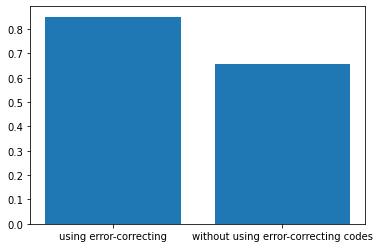

In [26]:
def Bin_Rv(n,k,p):
    p=comb(n,k)*(p**k)*((1-p)**(n-k))
    return p
W_HC=Bin_Rv(4,0,0.1)                 #we can reconstruct original message if X=0
HC=Bin_Rv(7,0,0.1)+Bin_Rv(7,1,0.1)   #we can reconstruct original message if X=0 or 1

data = {'using error-correcting': HC, 'without using error-correcting codes':W_HC }
names = list(data.keys())
values = list(data.values())
plt.bar(names, values)
print('Probability that we can reconstruct original message using error-correcting code:\n',HC)
print('Probability that we can reconstruct original message without using error-correcting code:\n',W_HC)
print('% Reliability Change:',((HC-W_HC)/W_HC)*100)

### 2
#### Let $X_{1}, X_{2},..., X_{100},$ be independent and uniformly distributed random variables over [0, 1] and Y = $\sum_{1}^{100}  X_{i}$
#### Generate the probability density function (PDF) of Y .

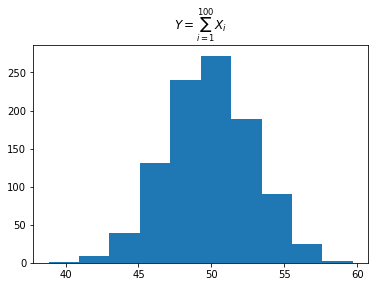

In [5]:
#fn for rv
def x(n=100):
    x=[]
    for i in range(n):
        x.append(np.random.uniform(0,1)) #generating 100 unifrom RVs between (0,1)
    return x
#fn for n no.of sums
def sumstorage(n):
    sum_1=[]
    for i in range(n):
        sum_1.append(sum(x(100))) #getting sum of 100 uniform RVs and storing in sum_1 (for n times)
    return sum_1
plt.hist(sumstorage(1000))
plt.title('$Y=\sum_{i=1}^{100}X_i$')
plt.show()

### 3
#### The autocorrelation sequence of a random process can be estimated from a finite number of samples, e.g. x(n) for n = 0, 1, . . . , N − 1. The autocorrelation may be estimated using the sample autocorrelation as:
$$ \hat r_{x}(k) = \frac{1}{N} \sum_{n=0}^{N-1} x(n) x^{\ast}(n-k)$$
#### Since x(n) is only given for values of n within the interval [0, N − 1], in evaluating this sum, x(n) is assumed to be equal to zero for values of n that are outside the interval [0, N − 1].
#### With x(n) = 1 for n = 0, 1, . . . , 7; plot the input sequence and the sample autocorrelation sequence ˆrx (each must be on a subplot).

Input [1, 1, 1, 1, 1, 1, 1, 1]
Rx [1.0, 0.875, 0.75, 0.625, 0.5, 0.375, 0.25, 0.125]


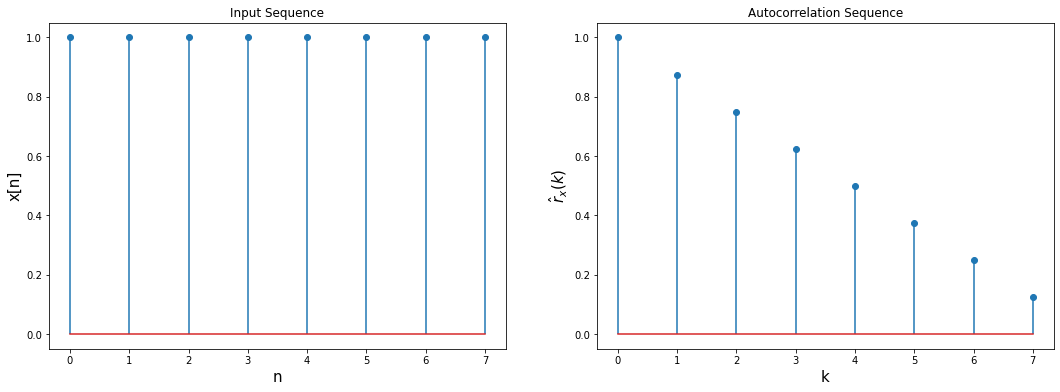

In [6]:
#fn for Xn
def x(n):
    return 1*(0<=n<=7)


n=np.arange(0,8,1)
xn=[]
Rx=[]
for i in n:
    xn.append(x(i))
print('Input',xn)

#calculating auto correlation
auto_corr_samples=auto_corr(xn,8)
print('Rx',auto_corr_samples)

# Plotting the result
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(n,xn)
plt.title('Input Sequence')
plt.xlabel('n',fontsize=15)
plt.ylabel('x[n]',fontsize=15)
plt.subplot(122)
plt.stem(auto_corr_samples)
plt.title('Autocorrelation Sequence')
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

### 4

#### (a) Generate N samples of zero mean with unit variance white Gaussian noise. Plot the histogram
#### (b) Estimate the first M lags of the autocorrelation sequence using the sample autocorrelation as
$$ \hat r_{x}(k) = \frac{1}{N} \sum_{n=0}^{N-1} x(n) x(n-k)$$
#### Determine that how close is your estimate to the true autocorrelation sequence $r_{x}(k) = δ(k)$?
#### (c) Segment your white noise sequence into ten different white noise sequences each having a length of M samples, and estimate the autocorrelation by averaging the sample autocorrelations of each subsequence, i.e.,
$$ \hat r_{x}(k) = \frac{1}{N} \sum_{m=0}^{9} \sum_{n=0}^{M-1} x(n+100m) x(n-k+100m), k=0,1,2...M-1$$
#### Compare your estimate to that in part (b)? Also, compare it to the true autocorrelation sequence rx(k)? Choose N = 1000 and M = 100.
#### (d)Generate 10000 samples of a zero mean with unit variance white Gaussian noise sequence and estimate the first 100 lags of the autocorrelation sequence as in part (b). Plot the histogram of white Gaussian noise for 10000 samples. Compare your estimate to that in part (b)? What conclusions can you draw from these experiments?

### 4a

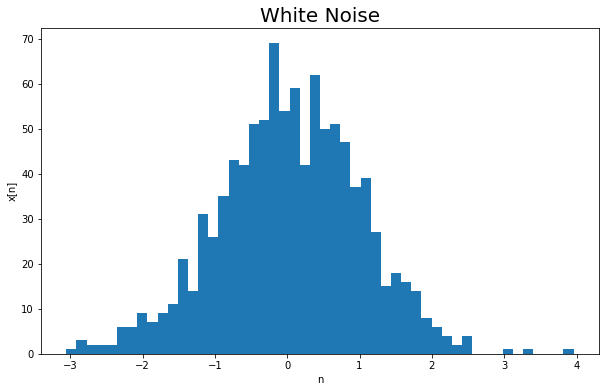

In [7]:
# Given length of M=100 and N=1000
np.random.seed(1)

# Defining white noise whose mean is 0 and standard deviation is 1,N=1000
white_gauss_noise = np.random.normal(0,1,1000)

plt.figure(figsize=(10,6))
plt.hist(white_gauss_noise,bins=50)
plt.title('White Noise',fontsize=20)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

### 4b

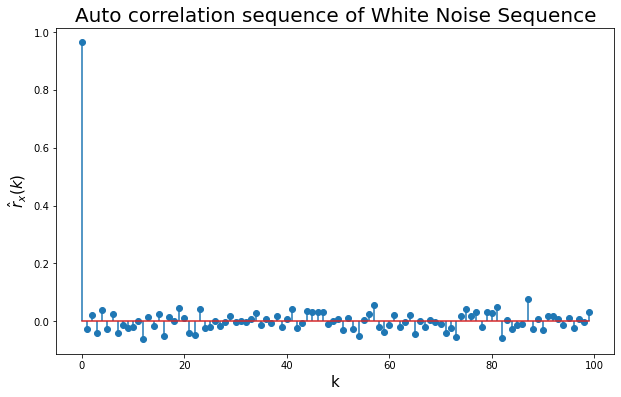

In [8]:
# Calculating autocorrleation of white noise of first 100 delays with the function defined in Q3

auto_corr1 = auto_corr(white_gauss_noise,100) #M=100

plt.figure(figsize=(10,6))
plt.stem(auto_corr1)
plt.title('Auto correlation sequence of White Noise Sequence',fontsize=20)
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

#### Autocorrelation of white noise resembles a unit impulse function

### 4c

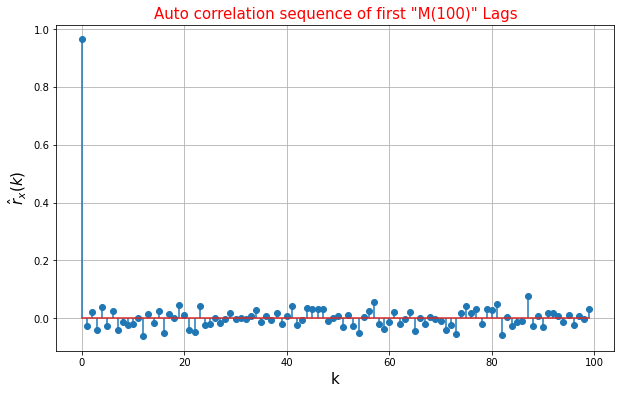

In [9]:
M = 100
Rxk_qc = np.zeros(M)
x = white_gauss_noise
#formula
for k in range(M): 
    res = 0
    for m in range(10):
        for n in range(M): 
            if n+100*m in range(1000) and (n-k)+100*m in range(1000):
                res += x[n+100*m] * x[(n-k)+100*m]
    Rxk_qc[k] = res/1000
            
plt.figure(figsize = (10,6))
plt.stem(Rxk_qc)
plt.xlabel('k' , size = 15 )
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.title(r'Auto correlation sequence of first "M(100)" Lags',color='r',size=15)
plt.grid()
plt.show()

#### By averaging autocorrelation by dividing the sequence, the autocorrelation gets closer to unit impluse function

### 4d

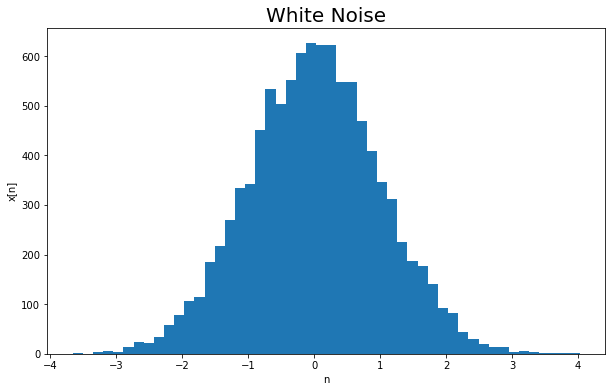

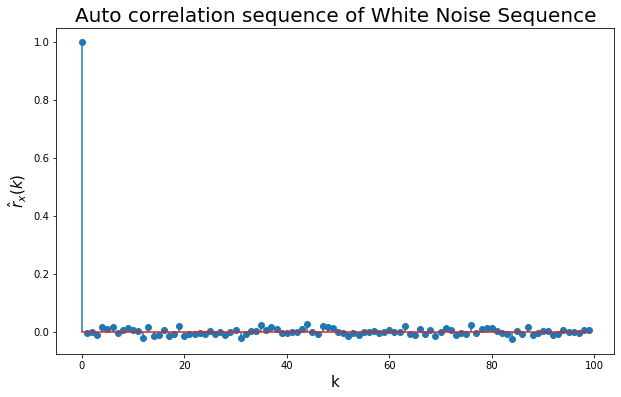

In [10]:
# Finding white noise for 10000 samples
np.random.seed(1)
white_gauss_noise2 = np.random.normal(0,1,10000)

plt.figure(figsize=(10,6))
plt.hist(white_gauss_noise2,bins=50)
plt.title('White Noise',fontsize=20)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

# Calculating autocorrelation for first 100 lags

auto_corr2 = auto_corr(white_gauss_noise2,100)

plt.figure(figsize=(10,6))
plt.stem(auto_corr2)
plt.title('Auto correlation sequence of White Noise Sequence',fontsize=20)
plt.xlabel('k',fontsize=15)
plt.ylabel('$\hat r_{x}(k)$',fontsize=15)
plt.show()

#### By increasing length of the sequence , the autocorrelation gets closer to impulse function

### 5
#### Download the “seeds” dataset from https://archive.ics.uci.edu/ ml/machine-learning-databases/00236/seeds_dataset.txt. It consists of 7 features. More details about the dataset can be found at https://archive.ics.uci.edu/ml/datasets/seeds. Define two custom functions (one for correlation and other for covariance), where each function takes two features as input and returns the correlation or covariance between the features as output. Use these functions to calculate the correlation and covariance between every possible pair of features in the dataset and display the result in the form of table (You are not allowed to use any inbuilt functions). Compare your function results with the inbuilt functions and tabulate them.
#### Correlation coefficient is given by:
$$ r_{xy} = \frac {\sum_{i=1}^{n} (x_{i}-\hat x)(y_{i}-\hat y)}{\sqrt {\sum_{i=1}^{n} (x_{i}-\hat x)^2}\sqrt{{\sum_{i=1}^{n}(y_{i}-\hat y)^2}}} $$
#### Covariance is given by:
$$ Cov_{xy} = \frac {\sum_{i=1}^{n} (x_{i}-\hat x)(y_{i}-\hat y)}{N-1} $$

In [11]:
def CorrelationCoeff(x,y):
    x_u=np.mean(x)
    x_den=np.sqrt(np.sum((x-np.mean(x))**2))
    y_u=np.mean(y)
    y_den=np.sqrt(np.sum((y-np.mean(y))**2))
    den=x_den*y_den
    num=np.sum((x-x_u)*(y-y_u))
    Corr_Coeff=num/den
    return Corr_Coeff
def cov(x,y):
    N=len(x)
    x_u=np.mean(x)
    y_u=np.mean(y)
    den=N-1
    num=np.sum((x-x_u)*(y-y_u))
    covariance=num/den
    return covariance

In [12]:
# read text file into pandas DataFrame
df_ip= pd.read_csv("seeds_dataset.txt", sep="\s+",header=None)
df= pd.read_csv("seeds_dataset.txt", sep="\s+",header=None)
df.drop(7, inplace=True, axis=1)#df with only features
display("Input Dataset",df_ip.head())


#calculation of cov and corr without inbuilt fn
Corr_fn=[]
Cov_fn=[]
for x in range(0,7):
    for y in range(0,7):
        feature1=np.array(df[x])
        feature2=np.array(df[y])
        Corr_fn.append(CorrelationCoeff(feature1,feature2))
        Cov_fn.append(cov(feature1,feature2))

        
#making df for both ops
df_Corr=pd.DataFrame(np.array(Corr_fn).reshape(7,7))
display("Correlation calculated without inbuilt function",df_Corr)
df_Corr_in_fn=df.corr()
display("Covariance calculated with inbuilt function",df_Corr_in_fn)
if ((df_Corr==df_Corr_in_fn).all):
    print("Correlation is same with inbuilt fn also")
    print('\n')
df_Cov=pd.DataFrame(np.array(Cov_fn).reshape(7,7))
display("Covariance calculated without inbuilt function",df_Cov)
df_Cov_in_fn=df.cov()
display("Covariance calculated with inbuilt function",df_Cov_in_fn)
if ((df_Cov==df_Cov_in_fn).all):
    print("Covariance is same with inbuilt fn also")




'Input Dataset'

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


'Correlation calculated without inbuilt function'

,0,1,2,3,4,5,6
0,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
1,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
2,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
3,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
4,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
5,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
6,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


'Covariance calculated with inbuilt function'

,0,1,2,3,4,5,6
0,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
1,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
2,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
3,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
4,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
5,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
6,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


Correlation is same with inbuilt fn also




'Covariance calculated without inbuilt function'

,0,1,2,3,4,5,6
0,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
1,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
2,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
3,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
4,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
5,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
6,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


'Covariance calculated with inbuilt function'

,0,1,2,3,4,5,6
0,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
1,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
2,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
3,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
4,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
5,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
6,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


Covariance is same with inbuilt fn also


### 6

#### Consider a random process X(t) =$ 5 sin (2t + ϕ_1) + 6 cos (3t + ϕ_2)$, where $ϕ_1 and ϕ_2$ are uniformly distributed in [−π, π] and [0, 2π], respectively, and $ϕ_1 and ϕ_2$ are independent of each other.
#### (a) Determine if X(t) is a Wide Sense Stationary (WSS) Process . If yes, plot X(t) and its auto-correlation sequence.
#### (b) If M(t) is a WSS process and M(t) is independent of ϕ1 and ϕ2, check whether the product M(t)X(t) is a WSS or not. Provide your explanation on a paper and share the screenshot of the same.

In [13]:
from sympy import *
 
# make a symbol
t, t1,t2,p1,p2 = symbols('t t1 t2 p1 p2')

intgr_mean=(5*sin(2*t+p1)+(6*cos(3*t+p2)))  #integrand for mean
integrand=((5*sin(2*t1+p1)+(6*cos(3*t1+p2)))*(5*sin(2*t2+p1)+(6*cos(3*t2+p2))))  #integrand for Rx

Mean=integrate(intgr_mean/(2*pi),(p2,0,2*pi),(p1,-pi,pi))
display('Mean=',simplify(Mean))

Rx=integrate(integrand/(4*pi*pi),(p2,0,2*pi),(p1,-pi,pi))
print("Rx(t1,t2)=")
display(simplify(Rx))


'Mean='

0

Rx(t1,t2)=


25*cos(2*t1 - 2*t2)/2 + 18*cos(3*t1 - 3*t2)

#### 1)Mean is Constant  i.e,$m_x(t)=E[X(t)]=Constant$
#### 2)Rx is function of Time Difference($\tau$) i.e, $R_x(t_1,t_2)=R_x(t_1-t_2)$
#### $\therefore$ X(t) is WSS

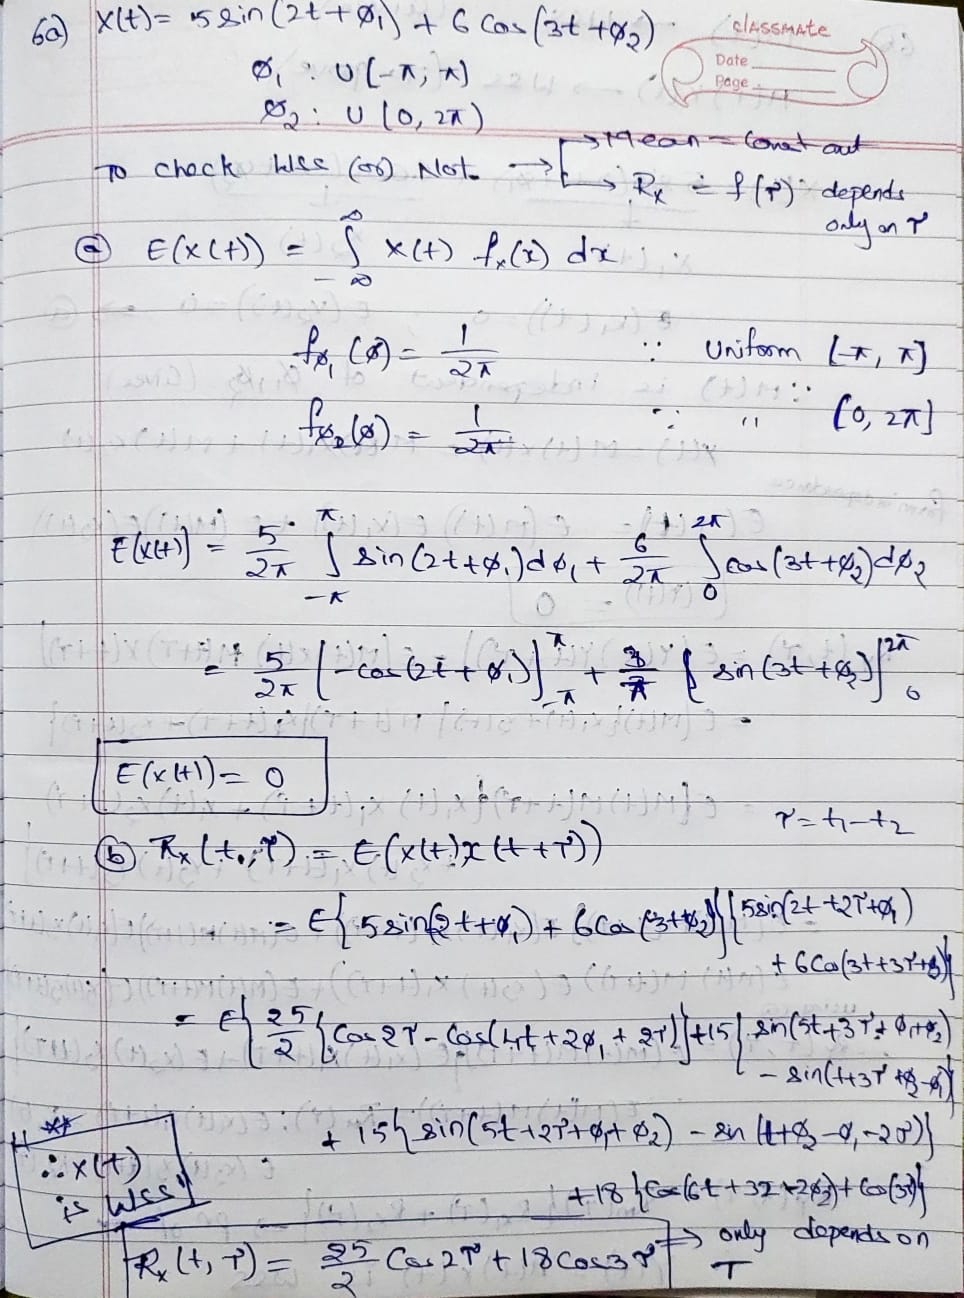

In [14]:
from IPython.display import Image

Image(filename='6a.jpeg',width=400, height=200)

# Checking whether x(t) is WSS or not

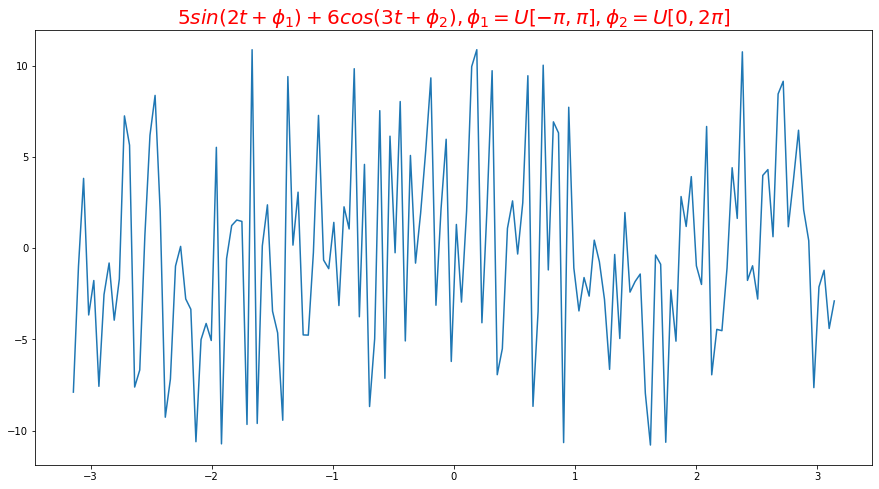

In [15]:
np.random.seed(1)
phi1=(np.random.uniform(-np.pi,np.pi,150))
phi2=(np.random.uniform(0,2*np.pi,150))
#fn for xn
def x6(t):
    return (5*np.sin(2*t+phi1)+(6*np.cos(3*t+phi2)))
#plotting xn   
t=np.linspace(-np.pi,np.pi,150)
plt.figure(figsize=(15,8))
plt.plot(t,x6(t))
plt.title("$5sin(2t+\phi_1)+6cos(3t+\phi_2), \phi_1=U[-\pi,\pi],\phi_2=U[0,2\pi]$",color='r',size=20)
plt.show()


<StemContainer object of 3 artists>

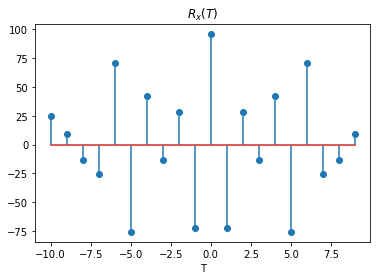

In [16]:
#plotting Rx
T=np.arange(-10,10,1)
R_seq=np.pi*((12.5*np.cos(2*(T)))+(18*np.cos(3*(T))))
plt.title("$R_x(T)$")
plt.xlabel('T')
plt.stem(T,R_seq)

### 6b

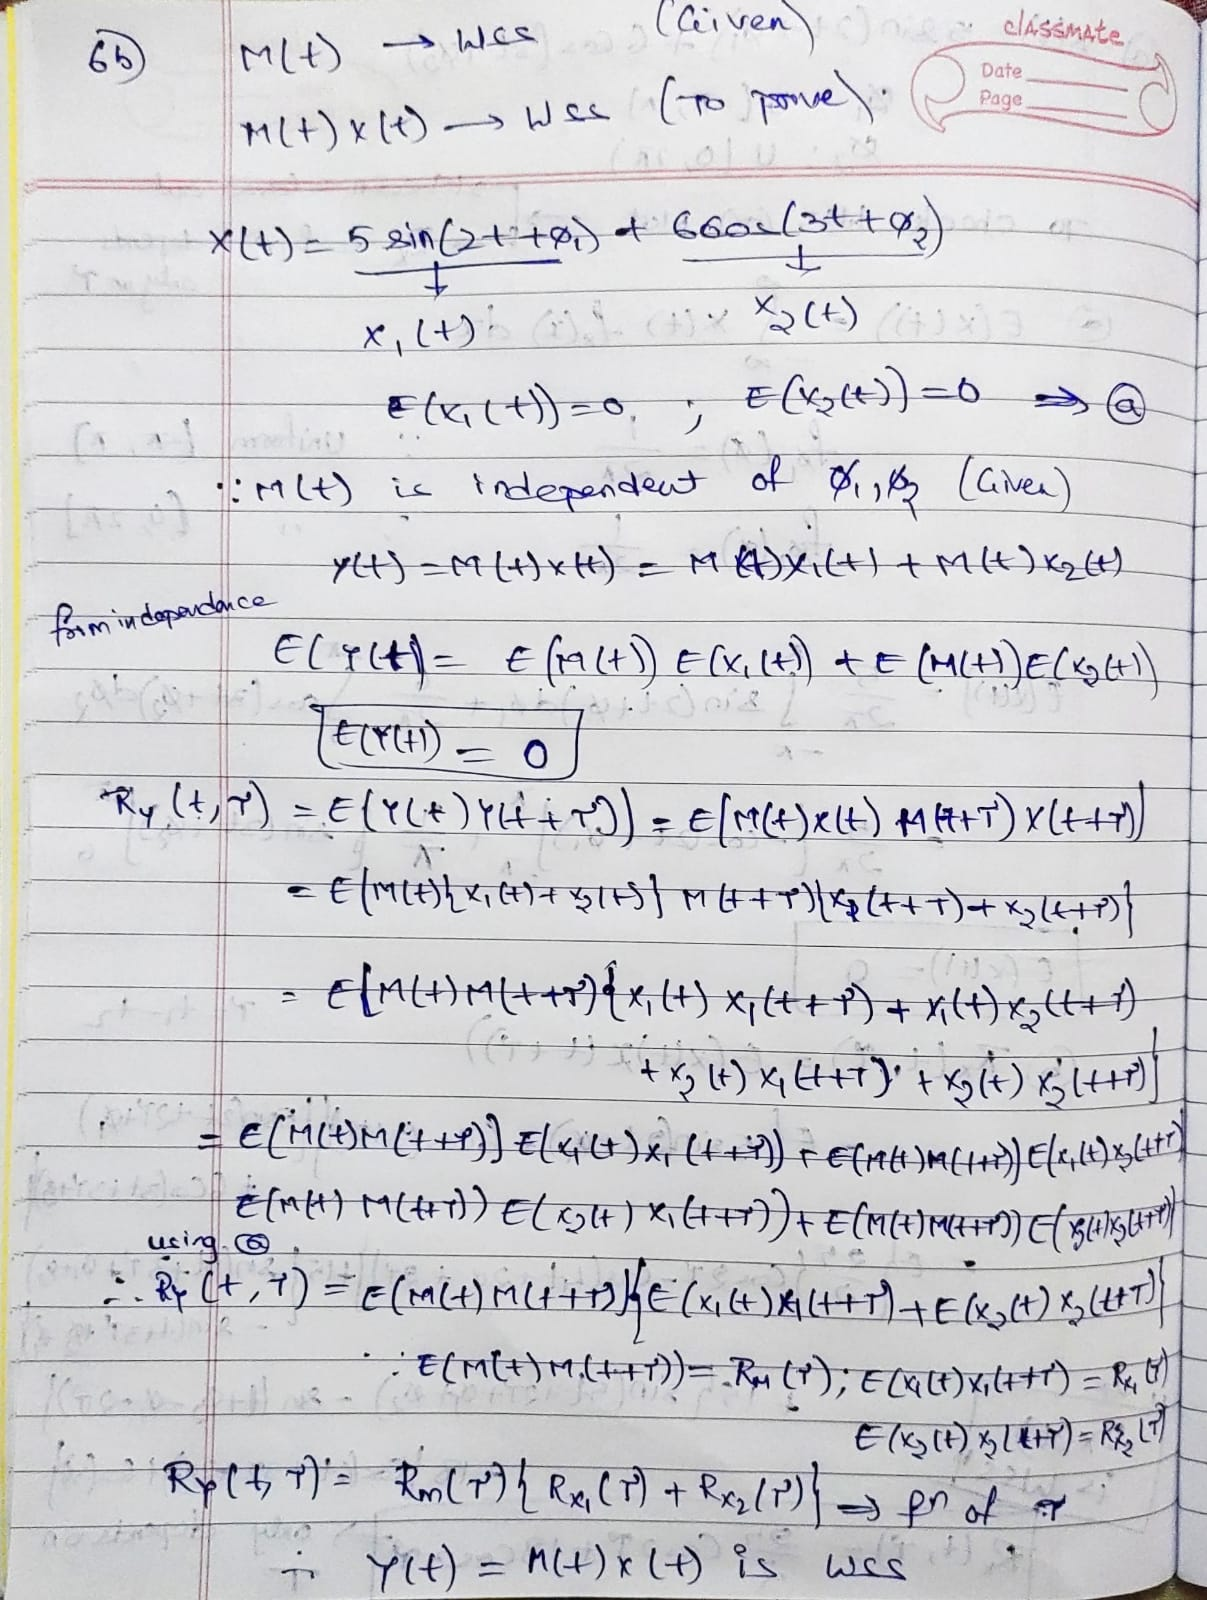

In [17]:
Image(filename='6b.jpeg',width=400, height=200)
# Checking whether M(t)X(t) is WSS or not

### Q.7.
#### (a) Draw out a sample for chi-squared distribution with degree of freedom 2 with size 2 × 3.
#### (b) Visualize chi-square distribution with degree of freedom = [1, 4, 8, 12] for a size of 1000.

a)The samples drawm from chi squared distribution is:



,0,1,2
0,3.341124,4.158269,2.332155
1,1.685590,0.351021,1.258018


b) Visualize chi-square distribution with degree of freedom = [1, 4, 8, 12] for a size of 1000.


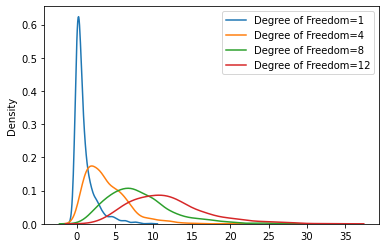

In [18]:
q_7a_chi_sam = np.random.chisquare(df=2,size=(2,3)) #chi sqr
#df of size 2*3
print('a)The samples drawm from chi squared distribution is:\n')
display(pd.DataFrame(q_7a_chi_sam))

#plotting chi sqr
print('b) Visualize chi-square distribution with degree of freedom = [1, 4, 8, 12] for a size of 1000.')
q_7b_chi_distribution1 = np.random.chisquare(df=1,size=1000)
q_7b_chi_distribution2 = np.random.chisquare(df=4,size=1000)
q_7b_chi_distribution3 = np.random.chisquare(df=8,size=1000)
q_7b_chi_distribution4 = np.random.chisquare(df=12,size=1000)
plt.figure(figsize=(6,4))
sns.kdeplot(q_7b_chi_distribution1,label='Degree of Freedom=1')
sns.kdeplot(q_7b_chi_distribution2,label='Degree of Freedom=4')
sns.kdeplot(q_7b_chi_distribution3,label='Degree of Freedom=8')
sns.kdeplot(q_7b_chi_distribution4,label='Degree of Freedom=12')
#plt.
plt.legend()
plt.show()

### Q.8.
#### (a) Draw out a sample for exponential distribution with 2.0 scale with 2x3 size
#### (b) Visualize exponential distribution for a size of 1000.

a)The sample drawm from Exponential distribution is:



,0,1,2
0,1.449391,2.491786,0.847557
1,0.520760,5.025284,1.002026


b) Visualize exponential distribution for a size of 1000.


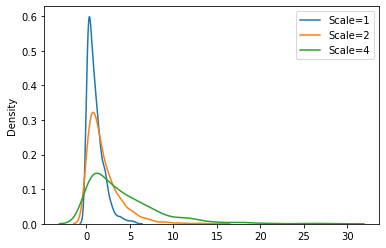

In [19]:
q_8a_e_sample = np.random.exponential(scale=2,size=(2,3))
#df of size 2*3
print('a)The sample drawm from Exponential distribution is:\n')
display(pd.DataFrame(q_8a_e_sample))

#exp dist for diff scales and sizes
q_8b_e_dist1 = np.random.exponential(size=1000)
q_8b_e_dist2 = np.random.exponential(scale=2,size=1000)
q_8b_e_dist3 = np.random.exponential(scale=4,size=1000)

#plotting exp dist for diff scales and sizes
print('b) Visualize exponential distribution for a size of 1000.')
plt.figure(figsize=(6,4))
sns.kdeplot(q_8b_e_dist1,label='Scale=1')
sns.kdeplot(q_8b_e_dist2,label='Scale=2')
sns.kdeplot(q_8b_e_dist3,label='Scale=4')
plt.legend()
plt.show()

### Q.9.
#### (a) Generate a 1-D array containing 100 values, where each value has to be 2, 4, 6 or 8. The probability for the value to be 2, 4, 6, and 8 is set to be 0.1, 0.3, 0.6, 0, respectively.
#### (b) For the same example as (a), return a 2-D array with 3 rows, each containing 5 values.

In [20]:
#generating 1d array of 100 samples with given values and there probabilties
np.random.seed(1)
a=np.random.choice([2,4,6,8],100 ,p=[0.1,0.3,0.6,0])
print("Size 100 array\n",a)

#generating size 3*5 ,15 samples with given values and there probabilties
b=(np.random.choice([2,4,6,8],(3,5),p=[0.1,0.3,0.6,0]))
print('Size 3*5 array\n',b)

Size 100 array
 [6 6 2 4 4 2 4 4 4 6 6 6 4 6 2 6 6 6 4 4 6 6 4 6 6 6 2 2 4 6 2 6 6 6 6 4 6
 6 2 6 6 6 4 6 4 6 6 4 4 4 2 6 4 4 6 2 6 4 6 6 4 6 6 6 2 6 6 6 6 6 6 4 4 6
 4 4 6 4 6 6 6 6 6 4 4 6 6 6 6 6 4 6 6 6 6 4 6 6 2 6]
Size 3*5 array
 [[4 6 6 4 6]
 [6 2 6 6 6]
 [4 4 6 6 2]]


--------------

### Q.10.
#### (a) Generate central chi-squared distributed random variables with degrees of freedom k = 1, 2, 3, 4, 5 and plot the PDFs. Write your own function, where the function takes input as degrees of freedom and returns output has chi-sqaured distributed random variable.
#### (b) Given the degrees of freedom k and non-centrality parameter λ, write a function to generate a sequence of random numbers that are non-central chi-squared distributed. Plot the PDFs for non-central chisquared random variables for two different degrees of freedom k = 2 and k = 4, each with three different non-centrality parameters λ = 1, 2, 3.

##### The pdf of a central chi squared distribution is given by
$$ f(x) = \frac{1}{2^{n/2} \Gamma(n/2)} x^{n/2-1} e^{-x/2}$$

##### The pdf of a non-central chi squared distribution is given by
$$ g(x) = \sum_{k=0}^{\infty} e^{-\lambda/2} \frac{(\lambda/2)^{k}}{k!} f_{n+2k}(x)$$  
##### where $ f_{k}(x) $ represent pdf of chi squared distribution with k degrees of freedom

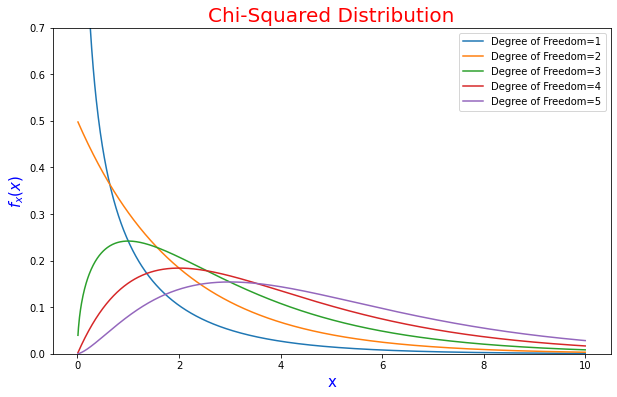

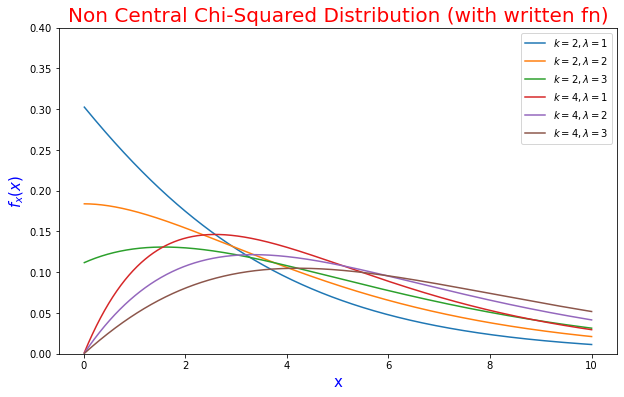

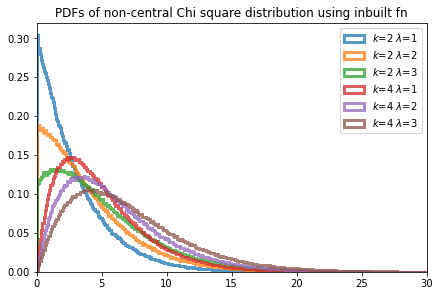

In [21]:
#fn for central chi sqr
def central_chi_sqr(n):
    y_chi = []
    x_chi = np.linspace(0.01,10,1000)
    for i in x_chi:
        num = np.power(i,(n/2-1)) * np.exp(-i/2)
        den = np.power(2,n/2) * math.gamma(n/2)
        y_chi.append(num/den)
    return y_chi
#fn for non central chi sqr
def non_central_chi_square(n,lam):
    y_non_cen_chi = 0
    var1 = 0
    var2 = 0
    
    for k in range(0,101):
        var1 = np.array(central_chi_sqr(n+2*k))
        var2 = np.exp(-lam/2) * np.power(lam/2,k) / math.factorial(k)
        y_non_cen_chi = y_non_cen_chi + var1*var2
    
    return y_non_cen_chi

#plotting central_chi_square(n) for different n
x=np.linspace(0.01,10,1000)
plt.figure(figsize=(10,6))
plt.plot(x, central_chi_sqr(1), label='Degree of Freedom=1')
plt.plot(x, central_chi_sqr(2), label='Degree of Freedom=2')
plt.plot(x, central_chi_sqr(3), label='Degree of Freedom=3')
plt.plot(x, central_chi_sqr(4), label='Degree of Freedom=4')
plt.plot(x, central_chi_sqr(5), label='Degree of Freedom=5')
plt.xlabel('x',fontsize=15,color='blue')
plt.ylabel('$f_{x}(x)$',fontsize=15,color='blue')
plt.title('Chi-Squared Distribution',color='r',fontsize=20)
plt.ylim(0,0.7)
plt.legend()
plt.show()

#plotting non_central_chi_square(n,lambda) for different n,lambda
plt.figure(figsize=(10,6))
plt.plot(x,  non_central_chi_square(2,1),  label='$k=2,\lambda=1$')
plt.plot(x,  non_central_chi_square(2,2),  label='$k=2,\lambda=2$')
plt.plot(x,  non_central_chi_square(2,3),  label='$k=2,\lambda=3$')
plt.plot(x,  non_central_chi_square(4,1),  label='$k=4,\lambda=1$')
plt.plot(x,  non_central_chi_square(4,2),  label='$k=4,\lambda=2$')
plt.plot(x,  non_central_chi_square(4,3),  label='$k=4,\lambda=3$')
plt.xlabel('x',fontsize=15,color='blue')
plt.ylabel('$f_{x}(x)$',fontsize=15,color='blue')
plt.title('Non Central Chi-Squared Distribution (with written fn)',fontsize=20,color='r')
plt.ylim(0,0.4)
plt.legend()
plt.show()



# with inbuilt fn
ks=np.asarray([2,4]) #degrees of freedoms to simulate
ldas = np.asarray([1,2,3]) #non-centrality parameters to simulate
nSamp=1000000 #number of samples to generate

fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True)

for i,k in enumerate(ks):
    for j,lda in enumerate(ldas):
        #Generate non-central Chi-squared distributed random numbers
        X = np.random.noncentral_chisquare(df=k, nonc = lda, size = nSamp)
        ax.hist(X,bins=500,density=True,label=r'$k$={} $\lambda$={}'.format(k,lda),\
        histtype='step',alpha=0.75, linewidth=3)

ax.set_xlim(left=0,right=30);ax.legend()
ax.set_title('PDFs of non-central Chi square distribution using inbuilt fn');
plt.show()

THE END